In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from importlib import reload
import structured_mesh as msh
import evaluations


70
1.0000000591389835
[[ 18 156]
 [ 19 138]
 [ 19 153]
 [ 19 169]
 [ 20 142]
 [ 20 173]
 [ 21 135]
 [ 22 115]
 [ 22 176]
 [ 23 179]
 [ 24 110]
 [ 24 189]
 [ 26  98]
 [ 27  90]
 [ 28  91]
 [ 29  95]
 [ 30 199]
 [ 32  90]
 [ 33  88]
 [ 34  87]
 [ 36  81]
 [ 37 208]
 [ 40  74]
 [ 41 210]
 [ 44 214]
 [ 49 217]
 [ 54 223]
 [ 58 223]
 [ 63 228]
 [ 70 229]
 [ 73 230]
 [ 80 232]
 [ 86 233]
 [ 91 232]
 [ 98 233]
 [104 234]
 [108 236]
 [115 233]
 [118 243]
 [125 233]
 [128 234]
 [129 238]
 [131 238]
 [135 231]
 [138 232]
 [146 231]
 [153 229]
 [158 226]
 [160 230]
 [164 226]
 [167 221]
 [171 219]
 [174 219]
 [178 214]
 [181 196]
 [184 209]
 [187 208]
 [191 205]
 [194 200]
 [198 193]
 [201 187]
 [204 182]
 [208 175]
 [210 177]
 [213 168]
 [215 163]
 [217 158]
 [219 157]
 [221 161]
 [233 156]]


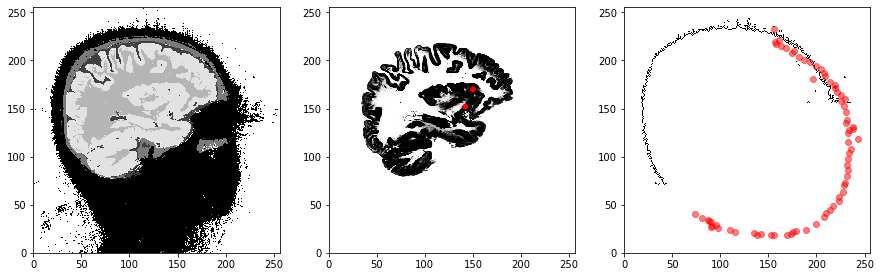

In [3]:
fig, axis = plt.subplots(1,3, figsize=(15,5))

tissue_prob_map = loadmat('/home/anne/Masterarbeit/masterarbeit/2d//data/T1SliceAnne.mat')
#print(tissue_prob_map)

gray_prob = tissue_prob_map['T1Slice']['gray'][0][0]
white_prob = tissue_prob_map['T1Slice']['white'][0][0]
skull_prob = tissue_prob_map['T1Slice']['skull'][0][0]
csf_prob = tissue_prob_map['T1Slice']['csf'][0][0]
scalp_prob = tissue_prob_map['T1Slice']['scalp'][0][0]

x = np.linspace(0, 1, 256)
y = np.linspace(0, 1, 256)
z = np.ndarray((256,256))
zz = np.ndarray((256,256))
g = np.ndarray((256,256))
boundary = np.zeros((256,256))

for i in range(256):
    for j in range(256):
        probs = [gray_prob[i,j],white_prob[i,j],skull_prob[i,j],csf_prob[i,j],scalp_prob[i,j]]
        g[j,i] = gray_prob[i,j]
        if gray_prob[i,j]>0.5: 
            z[j,i]=1
        elif white_prob[i,j]>0.5: 
            z[j,i]=2
        elif skull_prob[i,j]>0.5: 
            z[j,i]=3
        elif csf_prob[i,j]>0.5: 
            z[j,i]=4
        elif scalp_prob[i,j]>0.5: 
            z[j,i]=5
        else:
            z[j,i]=0

b = []
for i in range(255):
    for j in range(255):
        if (z[j,i] == 5 
        and (z[j-1,i] == 0 or z[j+1,i] == 0 or z[j,i-1] == 0 or z[j,i+1] == 0)
        and (j>155 or (j>70 and i<45))
        and (z[j-1,i] == 5 or z[j+1,i] == 5 or z[j,i-1] == 5 or z[j,i+1] == 5 or z[j-1,i-1] == 5 or z[j+1,i+1] == 5)):
            boundary[j,i] = 1
            b.append([i,j])
     
set = axis[0].pcolor(z, cmap='Greys')
set = axis[1].pcolor(g, cmap='Greys')
set = axis[2].pcolor(boundary, cmap='Greys')
axis[0].set_aspect(1)
axis[1].set_aspect(1)
axis[2].set_aspect(1)

electrodes = []
for k in range(0,len(b),10):
    electrodes.append(b[k])

print(len(electrodes))
np.savez_compressed("/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_realistic.npz", electrodes)

print(g[170,150])
evaluations.draw_point(axis[1], [150,170], alpha=1)
evaluations.draw_point(axis[1], [142,152], alpha=1)


electrodes = np.array(electrodes)
print(electrodes)
axis[2].scatter(electrodes[:,1], electrodes[:,0], c='red', alpha=0.5)

plt.show()


In [4]:
import structured_mesh 
reload(structured_mesh)

center = [128, 128]
center = np.array(center)

path = "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_16.npz"
mesh = structured_mesh.StructuredMesh(16)

theta = (150,50)
c = mesh.find_next_center(theta)
tissue_prob = mesh.gray_probs[int(c[0]+mesh.cells_per_dim*c[1])]
print(tissue_prob)


Created new mesh with 
 289 nodes 
 256 elements

0.26953126593980414


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


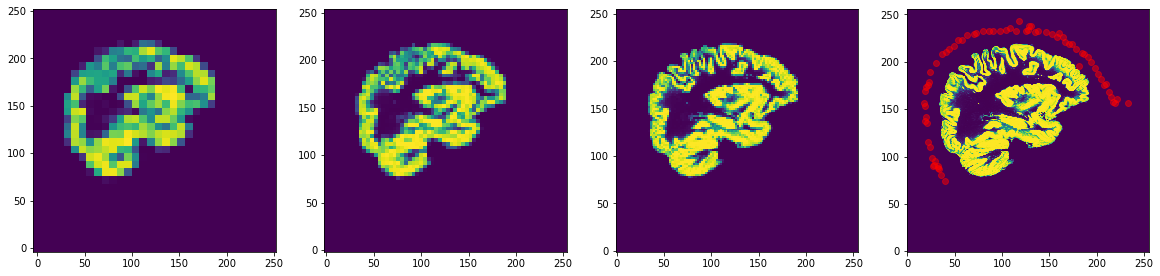

In [5]:
from os import name

fig, axis = plt.subplots(1,4, figsize=(20,5))

paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_32.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_64.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_128.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"]
numbers = [32,64,128,256]

point = [80,80]
for i in range(4):
    n = numbers[i]

    mesh = np.load(paths[i])

    elements = mesh['elements']
    nodes = mesh['nodes']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']
    print(gray_probs)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n),float)
    g = np.ndarray((n,n),float)

    x = nodes[:n,0]
    y = nodes[:n,0]

    for k in range(n):
        for j in range(n):
            z[k,j] = labels[k+n*j]
            g[k,j] = gray_probs[k+n*j]

    axis[i].pcolormesh(x,y,g)
    axis[i].set_aspect(1)

    axis[3].scatter(electrodes[:,0], electrodes[:,1], c='red', alpha=0.5)

plt.show()



Created new mesh with 
 1089 nodes 
 1024 elements

[21. 19.]
0.6760417066470836

Created new mesh with 
 4225 nodes 
 4096 elements

[43. 38.]
0.9389706437650602

Created new mesh with 
 16641 nodes 
 16384 elements

[85. 75.]
1.0000000591389835

Created new mesh with 
 66049 nodes 
 65536 elements

[170. 150.]
1.0000000591389835


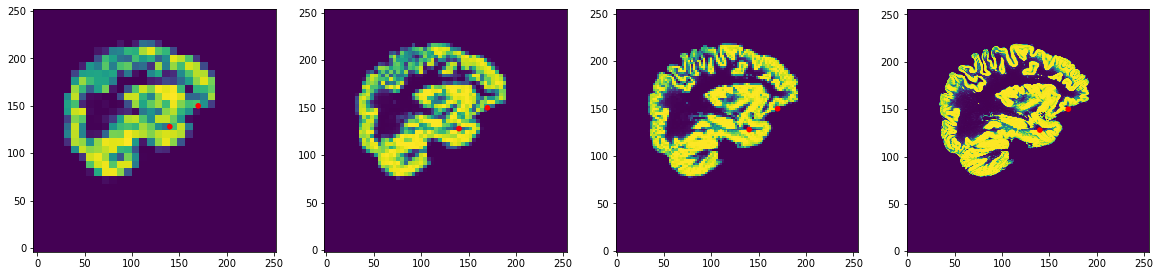

In [7]:
from os import name

fig, axis = plt.subplots(1,4, figsize=(20,5))

numbers = [32,64,128,256]

point = [170, 150]
for i in range(4):
    n = numbers[i]

    mesh = msh.StructuredMesh(n)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n),float)
    g = np.ndarray((n,n),float)

    x = mesh.nodes[:n,0]
    y = mesh.nodes[:n,0]

    for k in range(n):
        for j in range(n):
            z[k,j] = mesh.labels[k+n*j]
            g[k,j] = mesh.gray_probs[k+n*j]

    axis[i].pcolormesh(x,y,g)
    axis[i].set_aspect(1)

    evaluations.draw_point(axis[i], [170,150], alpha=1)
    evaluations.draw_point(axis[i], [140,128], alpha=1)

    c = mesh.find_next_center(point)
    print(c)
    print(g[int(c[0]),int(c[1])])



plt.show()